## Building flask api

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:

import sys
sys.path.insert(0, '../../')


In [3]:
from src.serve import *

Failed to load FluidSynth. Must install if you want to convert to wav files.


In [4]:
np.set_printoptions(edgeitems=10, threshold=40, linewidth=200)

In [5]:
data_dir = 'data/midi/v9/'
source_dir = 'midi_encode/np/shortdur'

file_path = Path('../../')
path = file_path/data_dir/source_dir
out_path = file_path/'data/generated/'

## Learn config

In [6]:
config = get_config(vocab_path=path/'tmp/all'); config

{'ctx_len': 150,
 'n_layers': 12,
 'n_heads': 10,
 'd_model': 256,
 'd_head': 41,
 'd_inner': 2100,
 'resid_p': 0.1,
 'attn_p': 0.1,
 'ff_p': 0.1,
 'embed_p': 0.1,
 'output_p': 0.1,
 'bias': False,
 'scale': True,
 'act': <Activation.GeLU: 3>,
 'double_drop': True,
 'tie_weights': True,
 'out_bias': True,
 'init': <function fastai.text.models.transformer.init_transformer(m)>,
 'mem_len': 512,
 'mask': True,
 'emb_map': [(0, 130, 128), (1, 132, 128)],
 'idx_map': {0: (0, 130, 128), 1: (1, 132, 128)},
 'loss_weights': [1, 1],
 'pad_idx': 0,
 'bos_idx': 2,
 'enc_offset': 3,
 'transpose_range': (0, 12),
 'mask_type': <MaskType.RandomWindow: 3>,
 'bs': 16,
 'bptt': 256}

In [7]:
data = load_data(path=path, cache_name='tmp/hook', **config)

In [8]:
saved_models = get_files(path/'models/hook', recurse=True); saved_models
load_path = saved_models[0]

In [13]:
htlist = get_htlist(path, source_dir, use_cache=False)

/Users/andrewshaw/miniconda3/envs/midi/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (1,4,15,18,19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [10]:
learn = load_learner(data, config, load_path)

In [11]:
# import pickle
# f = open("test_config.pkl","wb")
# pickle.dump(config,f)
# f.close()

### Songs

In [12]:
htlist

{'5455066523491398578': {'inferred_offset': -5.0,
  'song_url': 'https://www.hooktheory.com/theorytab/view/above-and-beyond/anjunabeach',
  'instruments': 'Piano,Piano',
  'ht_mode': 1.0,
  'midi_title': 'Anjunabeach',
  'title': 'Anjunabeach',
  'seconds': 58.18181818181818,
  'midi': 'midi_sources/hooktheory/pianoroll/a/above-and-beyond/anjunabeach/chorus_key_cmajor.mid',
  'inferred_key': 'D minor',
  'quarter_length': '64.0',
  'time_signature': '4/4',
  'source': 'hooktheory',
  'ht_offset': 0.0,
  'ht_bpm': 66.0,
  'artist': 'Above And Beyond',
  'ht_key': 'C',
  'ht_time_signature': 4.0,
  'bpm': 66.0,
  'section': 'chorus',
  'parts': 'chorus',
  'genres': 'Electronic',
  'mxl': None,
  'midi_transform': 'midi_transform/hooktheory/pianoroll/a/above-and-beyond/anjunabeach/chorus_key_cmajor.mid',
  'midi_npz': 'midi_npz/hooktheory/pianoroll/a/above-and-beyond/anjunabeach/chorus_key_cmajor.npz',
  'midi_npz_timesteps': 257.0,
  'numpy': 'midi_encode/np/shortdur/hooktheory/pianorol

In [ ]:
search_htlist(htlist, 'country ')

### Predict

In [17]:
fsong = search_htlist(htlist, 'country road')[0]

In [33]:
midi_file = fsong['midi']
midi_path = file_path/data_dir/midi_file; midi_path

PosixPath('../../data/midi/v9/midi_sources/hooktheory/pianoroll/j/john-denver/take-me-home-country-roads/bridge_key_cmajor.mid')

In [24]:
def midi2npenc(midi_file, num_comps=2):
    "Converts midi file to numpy encoding for language model"
    stream = file2stream(midi_file) # 1.
    s_arr = stream2chordarr(stream) # 2.
    seq = chordarr2seq(s_arr) # 3.
    return seq2npenc(seq, num_comps=num_comps)

In [25]:
npenc = midi2npenc(midi_path); npenc

### NOTE: looks like npenc does not include the separator. This means we don't have to remove the last step in order to keep predicting

In [26]:
npenc

array([[ 2,  0],
       [ 1,  3],
       [55, 11],
       [51, 11],
       [48, 11],
       [ 1,  4],
       [63,  5],
       [ 1,  4],
       [63,  5],
       [ 1,  4],
       ...,
       [ 1, 10],
       [65,  5],
       [ 1,  4],
       [67,  5],
       [ 1,  4],
       [68, 11],
       [56, 19],
       [53, 19],
       [50, 19],
       [46, 19]])

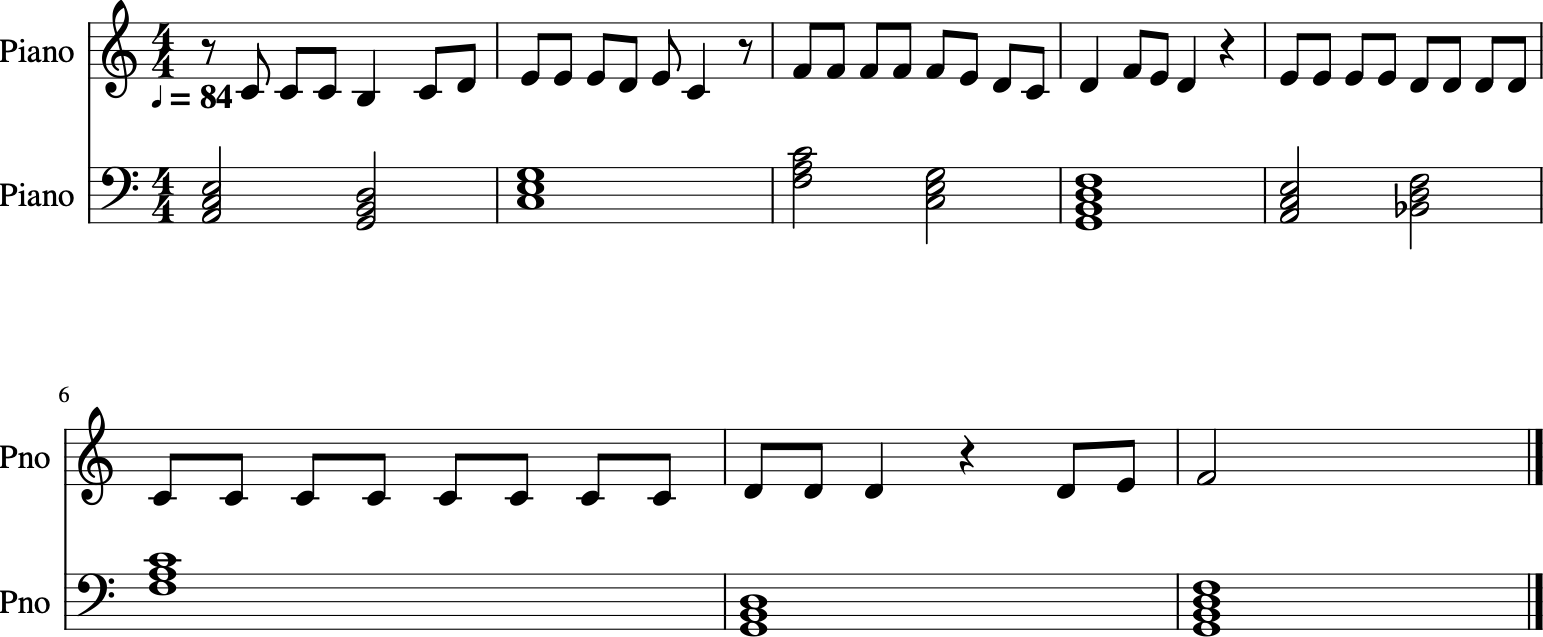

In [29]:
sorig = file2stream(midi_path)
sorig.show()

In [30]:
sorig.show('midi')

In [27]:
stream = npenc2stream(npenc)

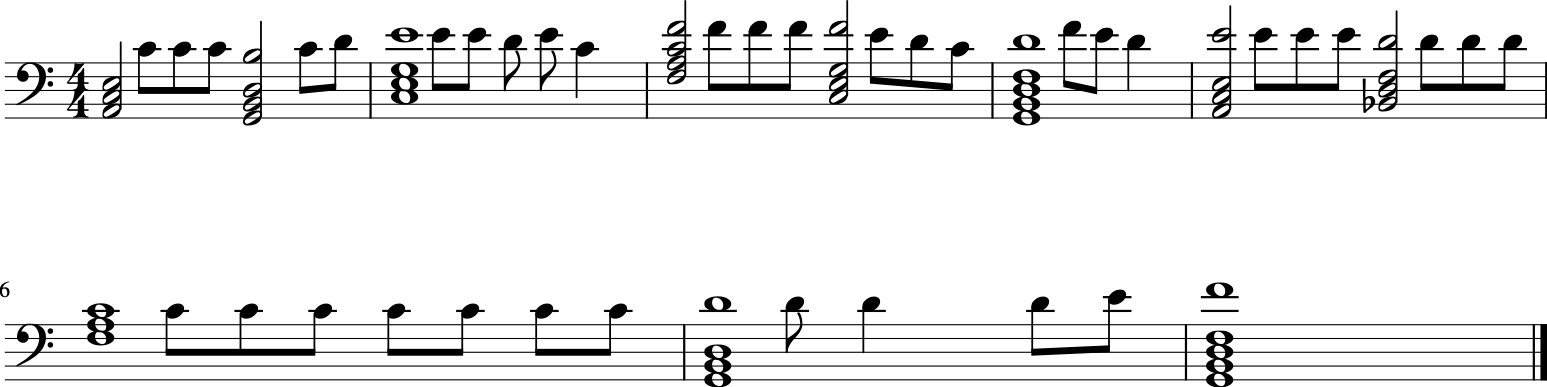

In [28]:
stream.show()

In [32]:
stream.show('midi')

In [ ]:
pred, seed, full = generate_predictions(learn, np_file=np_path)
pid = save_preds(pred, seed, full, out_path)
bpm = htlist[np_file]['ht_bpm']
midi, score = save_comps(out_path, pid, bpm=bpm)

In [28]:
np_file = fsong['numpy']
np_path = file_path/data_dir/np_file
pred, seed, full = generate_predictions(learn, np_file=np_path)
pid = save_preds(pred, seed, full, out_path)
bpm = htlist[np_file]['ht_bpm']
midi, score = save_comps(out_path, pid, bpm=bpm)


Predicted BOS token. Returning prediction...


In [29]:
from PIL import Image

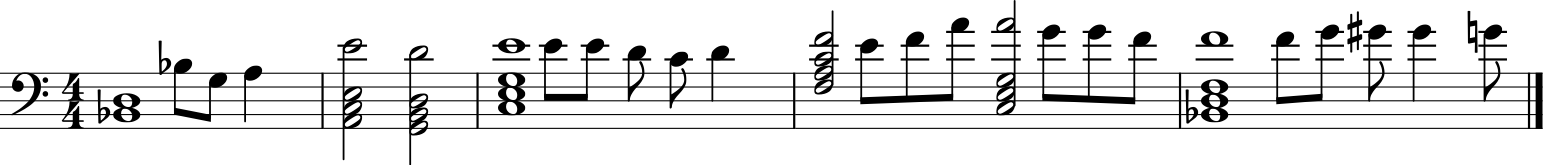

In [30]:
Image.open(score)

## Flask App

In [ ]:
from flask import Flask, Response, send_from_directory, send_file, request, jsonify

In [14]:
app = Flask(__name__)

In [15]:
@app.route('/hello/', methods=['GET', 'POST'])
def hello_world():
    return 'Hello, World!'

In [17]:

@app.route('/songs/all', methods=['GET', 'POST'])
def song_list():
    # get song name and artist from csv
    result = {
        'result': list(htlist.values())[:100]
    }
    return jsonify(result)

@app.route('/songs/search', methods=['GET', 'POST'])
def song_search():
    keywords = request.values.get('keywords', '')
    res = search_htlist(files, config, keywords)
    result = {
        'result': res
    }
    return jsonify(result)

In [18]:
@app.route('/midi/score')
def midi_score():
    'Show piano score image'
    pass

@app.route('/midi/file')
def midi_file():
    'Return npenc to midi'
    pass

@app.route('/midi/save')
def midi_save():
    'Save sequence from key-editor to midi'
    pass

In [19]:
@app.route('/predict', methods=['POST'])
def predict():
    args = request.json
    np_file = args['np_file']
    args['np_file'] = file_path/data_dir/np_file
    pred, seed, full = generate_predictions(learn, **args)
    pid = save_preds(pred, seed, full, out_path)
    bpm = htlist[np_file]['ht_bpm']
    midi, score = save_comps(out_path, pid, bpm=bpm)
    
    res = {
        'midi': midi.name,
        'score': score.name,
        'pid': pid
    }
    result = { 'result': res }
    return jsonify(result)


In [20]:

@app.route("/predict/<path:pid>/score/")
def pred_score(pid):
    return send_from_directory(out_path, f'{pid}/pred-1.png', mimetype='image/png')


In [21]:
@app.route("/predict/<path:pid>/midi/")
def pred_midi(pid):
#     path = out_path/pid/'pred.mid'
#     return send_file(path, mimetype='audio/midi')
    return send_from_directory(out_path, f'{pid}/pred.mid', mimetype='audio/midi')

In [22]:
# test_file = '../../data/midi/v9/midi_encode/np/shortdur/hooktheory/pianoroll/j/john-denver/take-me-home-country-roads/bridge_key_cmajor.npy'
# pred, seed, full = generate_predictions(np_file=test_file)
# pid = save_preds(pred, seed, full)
# midi, score = save_comps(pid)
# midi, score

In [23]:
# resp = pred_score('41111774-ce6c-4813-9501-ea2cf2711f68')

In [24]:
@app.route('/health')
def health_check():
    return Response("", status = 200)

# if __name__ == '__main__':
#     app.run(debug=True,host='0.0.0.0')

In [ ]:
from werkzeug.serving import run_simple
run_simple('localhost', 6006, app)

 * Running on http://localhost:6006/ (Press CTRL+C to quit)
127.0.0.1 - - [25/Mar/2019 20:45:09] "POST /hello HTTP/1.1" 301 -
127.0.0.1 - - [25/Mar/2019 20:45:09] "GET /hello/ HTTP/1.1" 200 -


Predicted BOS token. Returning prediction...


127.0.0.1 - - [25/Mar/2019 20:45:17] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [25/Mar/2019 20:45:17] "GET /predict/29ca7708-0efc-491c-a5a6-210d403ab41b/score HTTP/1.1" 301 -
127.0.0.1 - - [25/Mar/2019 20:45:17] "GET /predict/29ca7708-0efc-491c-a5a6-210d403ab41b/score/ HTTP/1.1" 404 -
127.0.0.1 - - [25/Mar/2019 20:45:17] "GET /predict/29ca7708-0efc-491c-a5a6-210d403ab41b/midi HTTP/1.1" 301 -
127.0.0.1 - - [25/Mar/2019 20:45:17] "GET /predict/29ca7708-0efc-491c-a5a6-210d403ab41b/midi/ HTTP/1.1" 404 -
127.0.0.1 - - [25/Mar/2019 20:45:44] "GET /predict/29ca7708-0efc-491c-a5a6-210d403ab41b/score HTTP/1.1" 301 -
127.0.0.1 - - [25/Mar/2019 20:45:44] "GET /predict/29ca7708-0efc-491c-a5a6-210d403ab41b/score/ HTTP/1.1" 404 -
127.0.0.1 - - [25/Mar/2019 20:45:52] "POST /songs/search HTTP/1.1" 200 -


### Music xml testing

Valid formats include (but are not limited to)::
    musicxml
    text
    midi
    lily (or lilypond)
    lily.png
    lily.pdf
    lily.svg
    braille
    vexflow
    musicxml.png

In [41]:
stream.write('musicxml.png', '/tmp/abc.xml')

'/tmp/abc-1.png'

In [47]:
midi.absolute()

PosixPath('/home/ubuntu/midi_generator/notebooks/numpy_encoding/../../data/generated/8ed91017-81f0-4c8e-8643-625b6b569527/pred.mid')

In [45]:
midi, score

(PosixPath('../../data/generated/8ed91017-81f0-4c8e-8643-625b6b569527/pred.mid'),
 PosixPath('/home/ubuntu/midi_generator/data/generated/8ed91017-81f0-4c8e-8643-625b6b569527/pred.xml'))

In [37]:
stream.show('musicxml.png')

SubConverterException: Cannot find a valid application path for format png. Specify this in your Environment by calling environment.set('graphicsPath', '/path/to/application')

In [43]:
from PIL import Image

In [ ]:
Image.open('/tmp/abc-1.png')